# K vizinhos mais próximos

Neste notebook vou demonstrar a utilização de um algoritmo de classificação chamado *K vizinhos mais próximos*.

Se trata de um dos modelos preditivos mais simples que existe. Sendo que não requer nenhuma noção de matemática muito profunda para compreender seu funcionamento e também é muito fácil de ser aplicado, sendo que tem poucos argumentos!

Porém, por um outro lado, o KNN não funciona bem com inputs categóricos ou com dimensionalidades muito altas, já que espaços de altas dimensões vão ficando cada vez mais vastos, e os vizinhos consequentemente ficando mais longe.

Mas bom, para deixar claro o que estou falando, vamos mostrar como funciona o KNN:

## A lógica por trás do KNN:

Antes de eu de fato começar a explicação, adianto que temos duas formas de aplicar o KNN, uma mais complicada, porém mais completa, e uma muito mais cômoda, vamos dizer assim. O que quero dizer é que podemos programar toda a lógica do KNN por meio de funções (e isso, na minha opinião, ajuda muito a entender o funcionamento do KNN), e também podemos usar o `scikit-learn` que já possui tudo pronto. E eu vou mostrar as duas formas.

Mas primeiro, vamos tentar entender o que o KNN faz e qual a lógica por trás:

Como eu disse anteriormente, o KNN é um **algoritmo de classificação**, ou seja, baseado em um dataset de amostra, o algoritmo irá tentar classificar algum *datapoint* novo.

Ou seja, basicamente, imagine que tenhamos um *dataset* que contém uma amostra de 100 animais, 50 são gatos e 50 são cachorros, e nessa amostra nós temos o peso e comprimento de cada um desses animais. E agora, vamos supor que recebemos o dado de um outro animal, porém esse novo dado não veio com a classificação entre gato e cachorro, contém apenas o peso e o comprimento. O que o KNN tenta fazer é classificar o animal comparando o peso e o comprimento dele com a nossa amostra de 100 animais!

E como que isso é feito? É tudo feito através da distância euclidiana dos pontos! E vai ficar muito mais simples de entender através de exemplos:

In [1]:
# importando algumas libs que vou usar agora para a demonstração

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import math

In [2]:
cancer_de_prostata = pd.read_csv('Prostate_Cancer.csv')

In [3]:
cancer_de_prostata.head(10)

,id,diagnosis_result,radius,texture,perimeter,area,smoothness,compactness,symmetry,fractal_dimension
0,1,M,23,12,151,954,0.143,0.278,0.242,0.079
1,2,B,9,13,133,1326,0.143,0.079,0.181,0.057
2,3,M,21,27,130,1203,0.125,0.160,0.207,0.060
3,4,M,14,16,78,386,0.070,0.284,0.260,0.097
4,5,M,9,19,135,1297,0.141,0.133,0.181,0.059
5,6,B,25,25,83,477,0.128,0.170,0.209,0.076
6,7,M,16,26,120,1040,0.095,0.109,0.179,0.057
7,8,M,15,18,90,578,0.119,0.165,0.220,0.075
8,9,M,19,24,88,520,0.127,0.193,0.235,0.074
9,10,M,25,11,84,476,0.119,0.240,0.203,0.082


In [4]:
cancer_de_prostata.describe()

,id,radius,texture,perimeter,area,smoothness,compactness,symmetry,fractal_dimension
count,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000
mean,50.500000,16.850000,18.230000,96.780000,702.880000,0.102730,0.126700,0.193170,0.064690
std,29.011492,4.879094,5.192954,23.676089,319.710895,0.014642,0.061144,0.030785,0.008151
min,1.000000,9.000000,11.000000,52.000000,202.000000,0.070000,0.038000,0.135000,0.053000
25%,25.750000,12.000000,14.000000,82.500000,476.750000,0.093500,0.080500,0.172000,0.059000
50%,50.500000,17.000000,17.500000,94.000000,644.000000,0.102000,0.118500,0.190000,0.063000
75%,75.250000,21.000000,22.250000,114.250000,917.000000,0.112000,0.157000,0.209000,0.069000
max,100.000000,25.000000,27.000000,172.000000,1878.000000,0.143000,0.345000,0.304000,0.097000


O que eu fiz acima foi importar um dataset que contém informações e diagnósticos de câncer de próstata. Temos a coluna *diagnosis_result* que nos fala se a massa é benigna ou maligna, e as outras colunas trazem informações sobre a massa presente na próstata. O que queremos fazer é o seguinte é classificar, apenas com base nas informações sobre a massa, se se trata de um tumor benigno ou maligno.

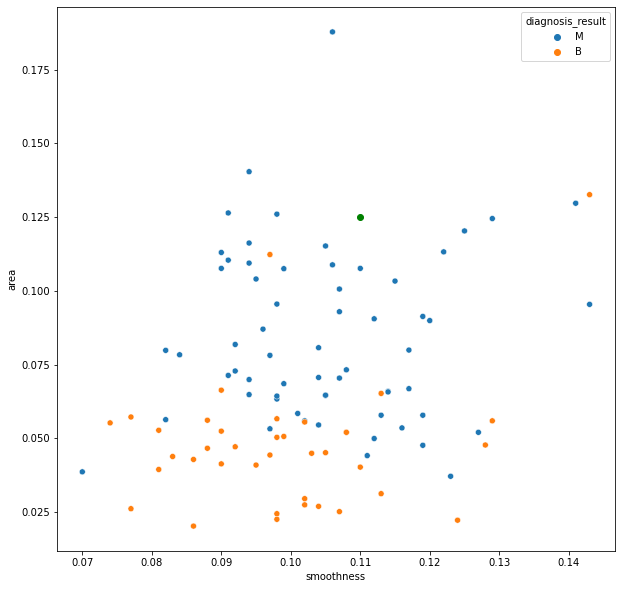

In [5]:
plt.figure(figsize=(10,10))
sns.scatterplot(x=cancer_de_prostata.smoothness,y=cancer_de_prostata.area/10000,hue=cancer_de_prostata.diagnosis_result)
plt.scatter(x=0.11, y=0.1250, color='g')

Para explicar o funcionamento do KNN, imagine, para efeitos de simplificação, que tenhamos apenas as duas características para cada tumor, demonstradas acima. E, que, tenhamos recebido um dado novo, o ponto verde, e queiramos prever se estamos falando de um tumor benigno ou maligno...

Apenas olhando o gráfico é possível que consigamos assumir uma coisa: esse ponto verde está mais perto dos pontos azuis do que dos pontos laranjas, ou seja, isso nos diz que provavelmente estamos faladno de um tumor maligno. E o que o KNN faz é mais ou menos isso, só que de fato realizando cálculos e não apenas por observação!

O que o KNN faz é:

- Calcular a distância desse ponto verde para todos os outros pontos do gráfico
- Ordenar todas as distâncias em ordem crescente
- Pegar as K menores distâncias (ou seja, os K vizinhos mais próximos)
    - *Nós que escolhemos o K*
- Vê, dentre os K mais próximos, qual é a categoria mais comum
- Classifica o ponto verde de acordo com essa categoria mais comum

### Programando o KNN:

In [6]:
df = cancer_de_prostata[['id', 'diagnosis_result', 'area','smoothness']]

In [7]:
df.area = df.area/10000 #tentando deixar a variavel de área na mesma magnitude de smoothness
# para que a distancia euclidiana não fique tendenciosa em um eixo

c:\users\joao\appdata\local\programs\python\python37\lib\site-packages\pandas\core\generic.py:5303: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[name] = value


In [8]:
pontos_classificados = list(zip(df.diagnosis_result, df.area, df.smoothness))

In [9]:
pontos_classificados

[('M', 0.0954, 0.14300000000000002),
 ('B', 0.1326, 0.14300000000000002),
 ('M', 0.1203, 0.125),
 ('M', 0.0386, 0.07),
 ('M', 0.1297, 0.141),
 ('B', 0.0477, 0.128),
 ('M', 0.104, 0.095),
 ('M', 0.0578, 0.11900000000000001),
 ('M', 0.052, 0.127),
 ('M', 0.0476, 0.11900000000000001),
 ('M', 0.0798, 0.08199999999999999),
 ('M', 0.0781, 0.09699999999999999),
 ('B', 0.1123, 0.09699999999999999),
 ('M', 0.0783, 0.084),
 ('M', 0.0578, 0.113),
 ('M', 0.0659, 0.114),
 ('M', 0.0685, 0.099),
 ('M', 0.0799, 0.11699999999999999),
 ('M', 0.126, 0.098),
 ('B', 0.0566, 0.098),
 ('B', 0.052, 0.10800000000000001),
 ('B', 0.0274, 0.102),
 ('M', 0.0704, 0.107),
 ('M', 0.1404, 0.094),
 ('M', 0.0905, 0.11199999999999999),
 ('M', 0.0913, 0.11900000000000001),
 ('M', 0.0645, 0.105),
 ('M', 0.1094, 0.094),
 ('M', 0.0732, 0.10800000000000001),
 ('M', 0.0955, 0.098),
 ('M', 0.1088, 0.106),
 ('M', 0.0441, 0.111),
 ('M', 0.0899, 0.12),
 ('M', 0.1162, 0.094),
 ('M', 0.0807, 0.10400000000000001),
 ('M', 0.087, 0.096

In [10]:
def calcula_distancia_euclidiana(ponto1, ponto2):

        x1 = ponto1[1]
        x2 = ponto2[1]
        y1 = ponto1[2]
        y2 = ponto2[2]
        
        return math.sqrt((x2-x1)**2+(y2-y1)**2)

In [11]:
ponto_a_classificar = ('?', 0.1250 , 0.11)

In [12]:
ponto_a_classificar

('?', 0.125, 0.11)

In [13]:
distancias = []

for ponto in pontos_classificados:
    distancia = calcula_distancia_euclidiana(ponto, ponto_a_classificar)
    distancias.append(distancia)

In [14]:
df['distancia'] = distancias

c:\users\joao\appdata\local\programs\python\python37\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [15]:
df.sort_values(by='distancia')

,id,diagnosis_result,area,smoothness,distancia
56,57,M,0.1152,0.105,0.011002
18,19,M,0.1260,0.098,0.012042
2,3,M,0.1203,0.125,0.015719
30,31,M,0.1088,0.106,0.016687
83,84,M,0.1132,0.122,0.016830
...,...,...,...,...,...
71,72,B,0.0244,0.098,0.101313
59,60,B,0.0225,0.098,0.103200
61,62,B,0.0222,0.124,0.103749
63,64,B,0.0261,0.077,0.104260


In [16]:
# Vamos definir o nosso K:

k=5

In [17]:
df.sort_values(by='distancia').head(k)

,id,diagnosis_result,area,smoothness,distancia
56,57,M,0.1152,0.105,0.011002
18,19,M,0.1260,0.098,0.012042
2,3,M,0.1203,0.125,0.015719
30,31,M,0.1088,0.106,0.016687
83,84,M,0.1132,0.122,0.016830


Veja que, para o nosso K, todos os pontos são de tumores malignos, ou seja, por meio do KNN podemos classificar esse novo tumor como maligno também!

Essa programação de KNN que eu fiz acima não é nem de longe a metodologia ideal para você aplicar em algum caso prático, porém, mostra como que de fato o algoritmo funciona!

Para casos práticos, eu recomendo fortemente que use diretamente o pacote do `scikit-learn`, que é o que vou demonstrar a seguir:

## KNN com scikit-learn

Primeiro vamos importar os dados, no caso, usarei um outro *dataset*, de diagnósticos de diabetes:

In [18]:
df = pd.read_csv('diabetes.csv')

In [20]:
df.head(10)

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,Pedigree,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
5,5,116,74,0,0,25.6,0.201,30,0
6,3,78,50,32,88,31.0,0.248,26,1
7,10,115,0,0,0,35.3,0.134,29,0
8,2,197,70,45,543,30.5,0.158,53,1
9,8,125,96,0,0,0.0,0.232,54,1


In [21]:
df.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,Pedigree,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


### Padronizando as variáveis

A primeira coisa que devemos fazer antes de rodar um modelo de KNN é padronizar a magnitude das variáveis (veja lá no outro exemplo do câncer de próstata, quando eu dividi a área por 10000, para deixar a área na mesma magnitude da *smoothness*). E temos que fazer isso porque, ao calcular a distância euclidiana entre pontos, se tivermos um eixo que tem uma magnitude muito maior do que os outros, é como se estivéssemos dando um viés maior para aquele eixo no processo de classificação!

Para padronizar as variáveis, podemos usar o próprio `scikit-learn`!

In [26]:
from sklearn.preprocessing import StandardScaler

In [27]:
padronizador = StandardScaler() # criando uma instância do StandardScaler

In [28]:
padronizador.fit(
    df.drop('Outcome', axis=1) # Queremos padronizar todas as colunas menos a da classificação
    )

StandardScaler()

In [29]:
padrao = padronizador.transform(df.drop('Outcome', axis=1))

In [31]:
df_padronizado = pd.DataFrame(padrao, columns=df.columns[:-1]) 
# Crio um novo df com a padronização, tirando a coluna da classificação
df_padronizado.head(10)

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,Pedigree,Age
0,0.639947,0.848324,0.149641,0.907270,-0.692891,0.204013,0.468492,1.425995
1,-0.844885,-1.123396,-0.160546,0.530902,-0.692891,-0.684422,-0.365061,-0.190672
2,1.233880,1.943724,-0.263941,-1.288212,-0.692891,-1.103255,0.604397,-0.105584
3,-0.844885,-0.998208,-0.160546,0.154533,0.123302,-0.494043,-0.920763,-1.041549
4,-1.141852,0.504055,-1.504687,0.907270,0.765836,1.409746,5.484909,-0.020496
5,0.342981,-0.153185,0.253036,-1.288212,-0.692891,-0.811341,-0.818079,-0.275760
6,-0.250952,-1.342476,-0.987710,0.719086,0.071204,-0.125977,-0.676133,-0.616111
7,1.827813,-0.184482,-3.572597,-1.288212,-0.692891,0.419775,-1.020427,-0.360847
8,-0.547919,2.381884,0.046245,1.534551,4.021922,-0.189437,-0.947944,1.681259
9,1.233880,0.128489,1.390387,-1.288212,-0.692891,-4.060474,-0.724455,1.766346


### Separando o DF em treino e teste:

In [32]:
from sklearn.model_selection import train_test_split

In [33]:
X_train, X_test, y_train, y_test = train_test_split(df_padronizado, df['Outcome'], test_size=0.30)

### Rodando o KNN:

In [36]:
from sklearn.neighbors import KNeighborsClassifier

In [37]:
knn = KNeighborsClassifier(n_neighbors=1) #começamos com K=1 só para efeitos de demonstração

In [38]:
knn.fit(X_train,y_train)

KNeighborsClassifier(n_neighbors=1)

In [39]:
knn.get_params()

{'algorithm': 'auto',
 'leaf_size': 30,
 'metric': 'minkowski',
 'metric_params': None,
 'n_jobs': None,
 'n_neighbors': 1,
 'p': 2,
 'weights': 'uniform'}

In [40]:
pred = knn.predict(X_test)

In [42]:
pred # nossa previsão

array([0, 1, 0, 0, 1, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0,
       1, 1, 0, 1, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1, 0, 1, 0, 0, 0, 1, 1, 0,
       1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 1,
       0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 1, 0, 0,
       0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0,
       0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1,
       0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 1, 1, 1, 1, 0, 1, 0, 0,
       1, 0, 1, 0, 0, 1, 0, 0, 1, 1, 1, 1, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0,
       0, 1, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1,
       0, 0, 1, 0, 1, 1, 0, 0, 1, 0, 1], dtype=int64)

### Avaliando um modelo de k=1

In [43]:
from sklearn.metrics import classification_report,confusion_matrix

In [44]:
print(confusion_matrix(y_test,pred))

[[117  33]
 [ 33  48]]


In [45]:
print(classification_report(y_test,pred))

              precision    recall  f1-score   support

           0       0.78      0.78      0.78       150
           1       0.59      0.59      0.59        81

    accuracy                           0.71       231
   macro avg       0.69      0.69      0.69       231
weighted avg       0.71      0.71      0.71       231



### Escolhendo o melhor valor de K:

In [47]:
taxa_de_erro = []

# Vamos rodar modelos com o K variando de 1 a 50
for i in range(1,50):
    
    knn = KNeighborsClassifier(n_neighbors=i)
    knn.fit(X_train,y_train)
    pred_i = knn.predict(X_test)
    taxa_de_erro.append(np.mean(pred_i != y_test))

Text(0, 0.5, 'Taxa de Erro')

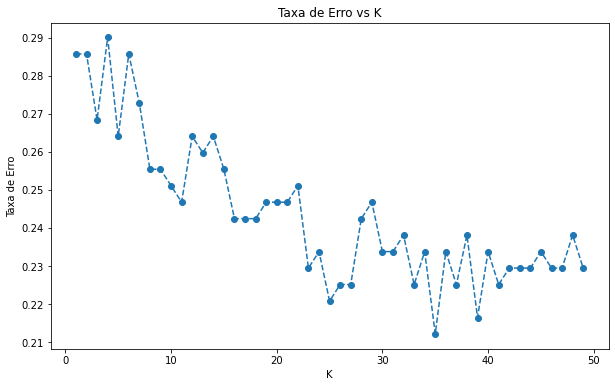

In [56]:
plt.figure(figsize=(10,6))
plt.plot(range(1,50), taxa_de_erro, linestyle='--', marker='o')
plt.title('Taxa de Erro vs K')
plt.xlabel('K')
plt.ylabel('Taxa de Erro')

Com o gráfico acima, conseguimos facilmente ver que partimos de um erro consideravelmente maior em K=1 e nosso erro foi caindo conforme aumentávamos o valor de K. Observando o gráfico, parece que conseguimos o menor erro com K em 35, então esse será o valor de K que escolheremos para classificar o nosso modelo!

In [65]:
# Só vou plotar o modelo com K=1 para efeitos de comparação: 

knn = KNeighborsClassifier(n_neighbors=1)
knn.fit(X_train,y_train)
pred = knn.predict(X_test)
print('Matriz de confusão com K=1:')
print(confusion_matrix(y_test,pred))
print('\n')
print('Relatório de modelo com K=1:')
print(classification_report(y_test,pred))

Matriz de confusão com K=1:
[[117  33]
 [ 33  48]]


Relatório de modelo com K=1:
              precision    recall  f1-score   support

           0       0.78      0.78      0.78       150
           1       0.59      0.59      0.59        81

    accuracy                           0.71       231
   macro avg       0.69      0.69      0.69       231
weighted avg       0.71      0.71      0.71       231



In [66]:
# Só vou plotar o modelo com K=35 para efeitos de comparação: 

knn = KNeighborsClassifier(n_neighbors=35)
knn.fit(X_train,y_train)
pred = knn.predict(X_test)
print('Matriz de confusão com K=35:')
print(confusion_matrix(y_test,pred))
print('\n')
print('Relatório de modelo com K=35:')
print(classification_report(y_test,pred))

Matriz de confusão com K=35:
[[138  12]
 [ 37  44]]


Relatório de modelo com K=35:
              precision    recall  f1-score   support

           0       0.79      0.92      0.85       150
           1       0.79      0.54      0.64        81

    accuracy                           0.79       231
   macro avg       0.79      0.73      0.75       231
weighted avg       0.79      0.79      0.78       231



Veja que com o K=35 nosso modelo foi consideravelmente melhor do que com K=1!

Criado por:

**u/_jvsm**